## Task 1: Image Negative Transformation
### Objective: Create an image negative using Python.
**Steps:**
* Load a grayscale image.
* Apply the image negative transformation.
* Display the original and the negative image.


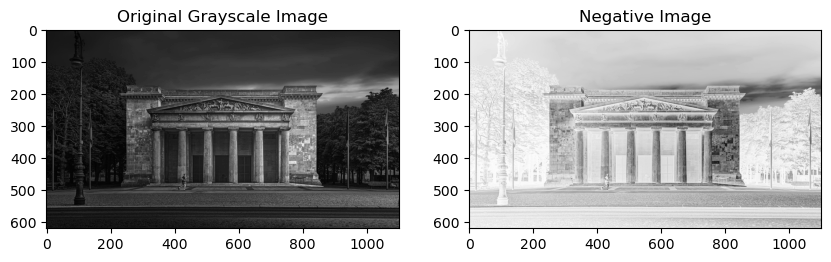

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load a grayscale image
image_path = r'C:\Users\DELL\Machine_Vision\gray_img_lab1.jpg'
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was successfully loaded
if image_gray is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Step 2: Apply the image negative transformation
    image_negative = 255 - image_gray

    # Step 3: Display the original and the negative image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Original Grayscale Image')

    plt.subplot(1, 2, 2)
    plt.imshow(image_negative, cmap='gray')
    plt.title('Negative Image')

    plt.show()


## Task 2: Gamma Correction
### Objective: Apply gamma correction with different gamma values.
### Steps:
* Load a grayscale image.
* Apply gamma correction with γ=0.5\gamma = 0.5γ=0.5, γ=1.0\gamma = 1.0γ=1.0, and γ=2.0
\gamma = 2.0γ=2.0.

* Display the original and the gamma-corrected images

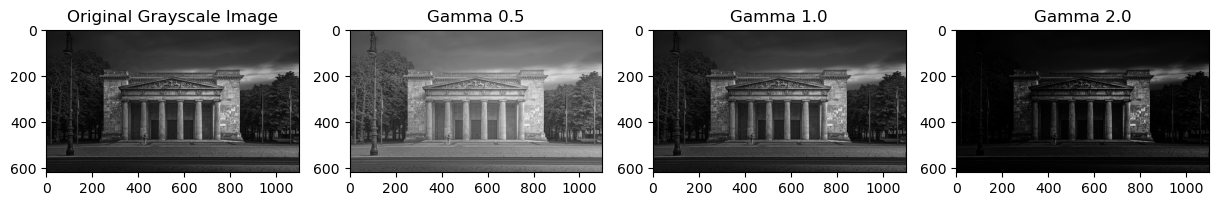

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio  # Import the v2 module to avoid deprecation warning

# Step 1: Load a grayscale image
image_path = r'C:\Users\DELL\Machine_Vision\gray_img_lab1.jpg'
image_gray = imageio.imread(image_path, mode='L')

# Normalize the image to range [0, 1]
image_gray = image_gray / 255.0

def apply_gamma_correction(image, gamma):
    # Apply gamma correction
    gamma_corrected = np.power(image, gamma)
    return gamma_corrected

if image_gray is not None:
    # Step 2: Apply gamma correction
    gamma_05 = apply_gamma_correction(image_gray, 0.5)
    gamma_10 = apply_gamma_correction(image_gray, 1.0)
    gamma_20 = apply_gamma_correction(image_gray, 2.0)

    # Step 3: Display the original and the gamma-corrected images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Original Grayscale Image')

    plt.subplot(1, 4, 2)
    plt.imshow(gamma_05, cmap='gray')
    plt.title('Gamma 0.5')

    plt.subplot(1, 4, 3)
    plt.imshow(gamma_10, cmap='gray')
    plt.title('Gamma 1.0')

    plt.subplot(1, 4, 4)
    plt.imshow(gamma_20, cmap='gray')
    plt.title('Gamma 2.0')

    plt.show()


## Task 3: Log Transform
### Objective: Apply log transformation to enhance an image.
### Steps:
* Load a grayscale image.
* Apply log transformation.
* Display the original and the log-transformed image.

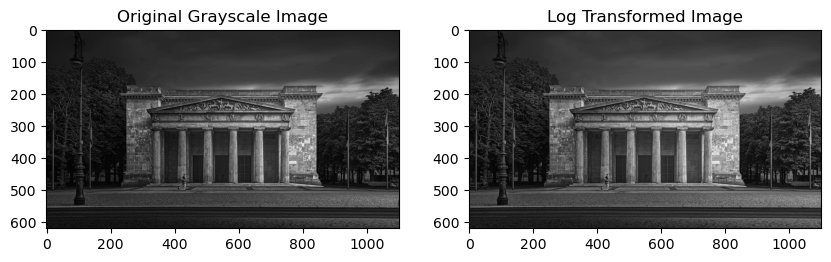

In [16]:
def apply_log_transform(image):
    # Apply log transformation
    c = 1 / np.log(1 + np.max(image))
    log_transformed = c * (np.log(1 + image))
    return log_transformed

if image_gray is not None:
    # Step 2: Apply log transformation
    log_transformed = apply_log_transform(image_gray)

    # Step 3: Display the original and the log-transformed image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Original Grayscale Image')

    plt.subplot(1, 2, 2)
    plt.imshow(log_transformed, cmap='gray')
    plt.title('Log Transformed Image')

    plt.show()


## Task 4: Compare Transformations
### Objective: Compare the effects of different transformations.
### Steps:
* Load a grayscale image.
* Apply image negative, gamma correction (γ=2.0\gamma = 2.0γ=2.0), and log transformation.
* Display the original image alongside the transformed images for comparison.

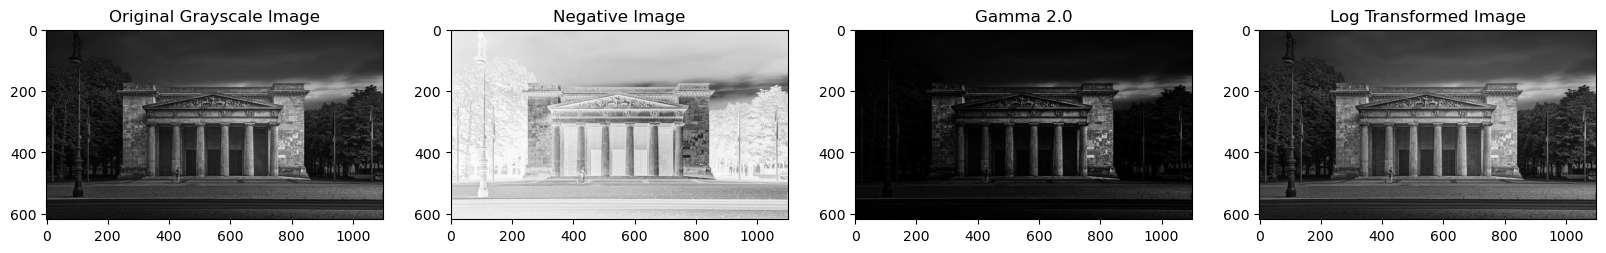

In [19]:
if image_gray is not None:
    # Apply transformations
    image_negative = 1.0 - image_gray
    gamma_20 = apply_gamma_correction(image_gray, 2.0)
    log_transformed = apply_log_transform(image_gray)

    # Display the original and transformed images
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 4, 1)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Original Grayscale Image')

    plt.subplot(1, 4, 2)
    plt.imshow(image_negative, cmap='gray')
    plt.title('Negative Image')

    plt.subplot(1, 4, 3)
    plt.imshow(gamma_20, cmap='gray')
    plt.title('Gamma 2.0')

    plt.subplot(1, 4, 4)
    plt.imshow(log_transformed, cmap='gray')
    plt.title('Log Transformed Image')

    plt.show()


## Task 5: Apply Transformations to Color Images
### Objective: Apply the transformations to a color image by processing each channel separately.
### Steps:
* Load a color image.
* Split the image into its R, G, and B channels.
* Apply image negative, gamma correction, and log transformation to each channel.
* Merge the channels back together.
* Display the original and the transformed images

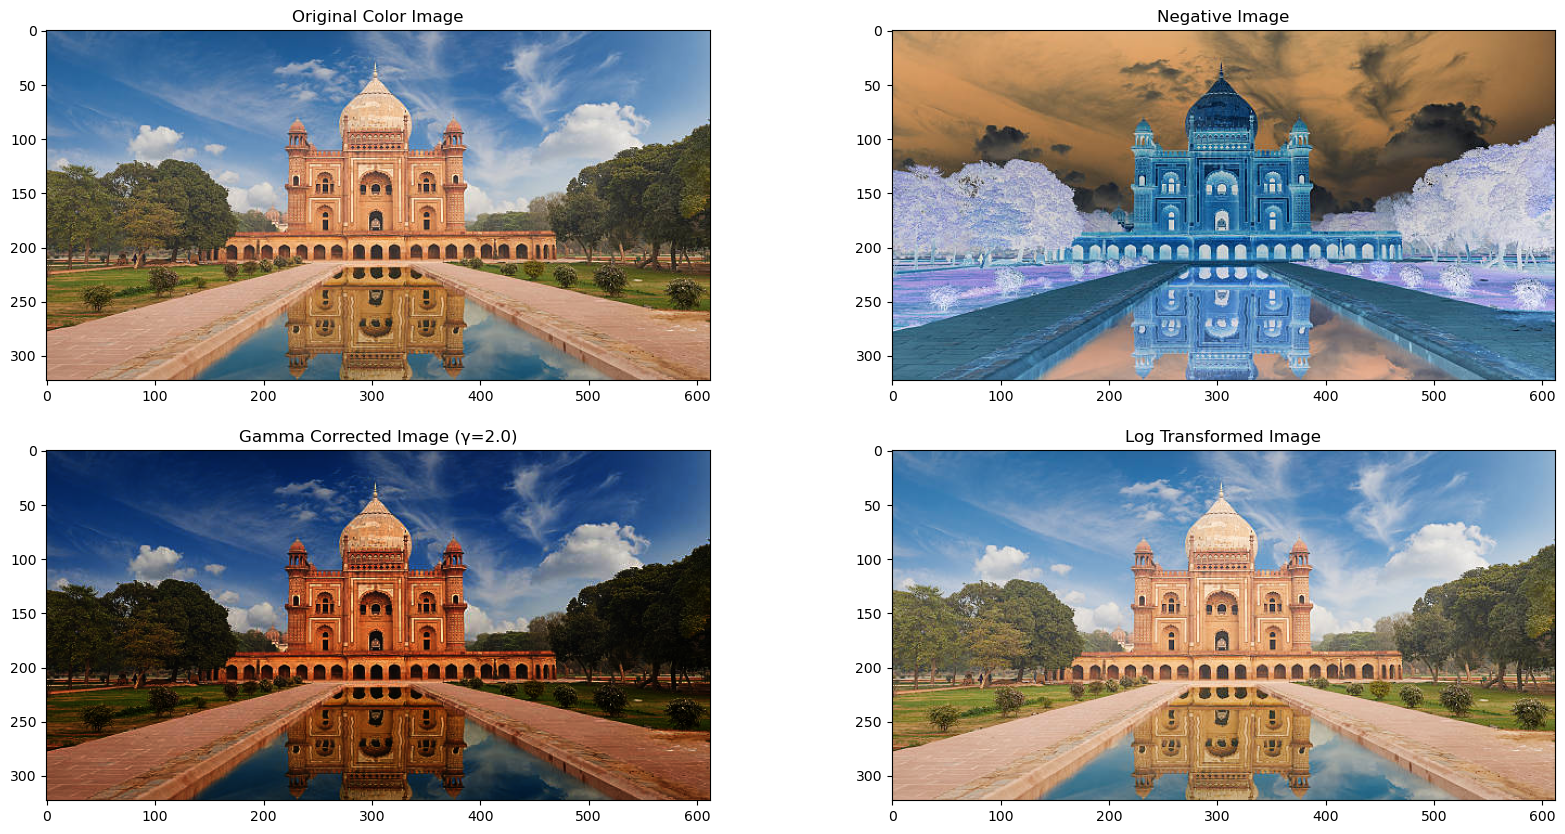

In [23]:
# Step 1: Load a color image
image_color_path = r'C:\Users\DELL\Machine_Vision\lab1.jpg'
image_color = imageio.imread(image_color_path)

# Check if the image was successfully loaded
if image_color is None:
    print(f"Error: Unable to load image from {image_color_path}")
else:
    # Normalize the image to range [0, 1]
    image_color = image_color / 255.0

    # Step 2: Split the image into its R, G, and B channels
    r, g, b = image_color[..., 0], image_color[..., 1], image_color[..., 2]

    # Step 3: Apply transformations to each channel
    r_negative = 1.0 - r
    g_negative = 1.0 - g
    b_negative = 1.0 - b

    r_gamma = apply_gamma_correction(r, 2.0)
    g_gamma = apply_gamma_correction(g, 2.0)
    b_gamma = apply_gamma_correction(b, 2.0)

    r_log = apply_log_transform(r)
    g_log = apply_log_transform(g)
    b_log = apply_log_transform(b)

    # Merge the channels back together
    negative_image = np.stack([r_negative, g_negative, b_negative], axis=-1)
    gamma_image = np.stack([r_gamma, g_gamma, b_gamma], axis=-1)
    log_image = np.stack([r_log, g_log, b_log], axis=-1)

    # Step 5: Display the original and the transformed images
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(image_color)
    plt.title('Original Color Image')

    plt.subplot(2, 2, 2)
    plt.imshow(negative_image)
    plt.title('Negative Image')

    plt.subplot(2, 2, 3)
    plt.imshow(gamma_image)
    plt.title('Gamma Corrected Image (γ=2.0)')

    plt.subplot(2, 2, 4)
    plt.imshow(log_image)
    plt.title('Log Transformed Image')

    plt.show()
